# Semantica relation GRaph visualized

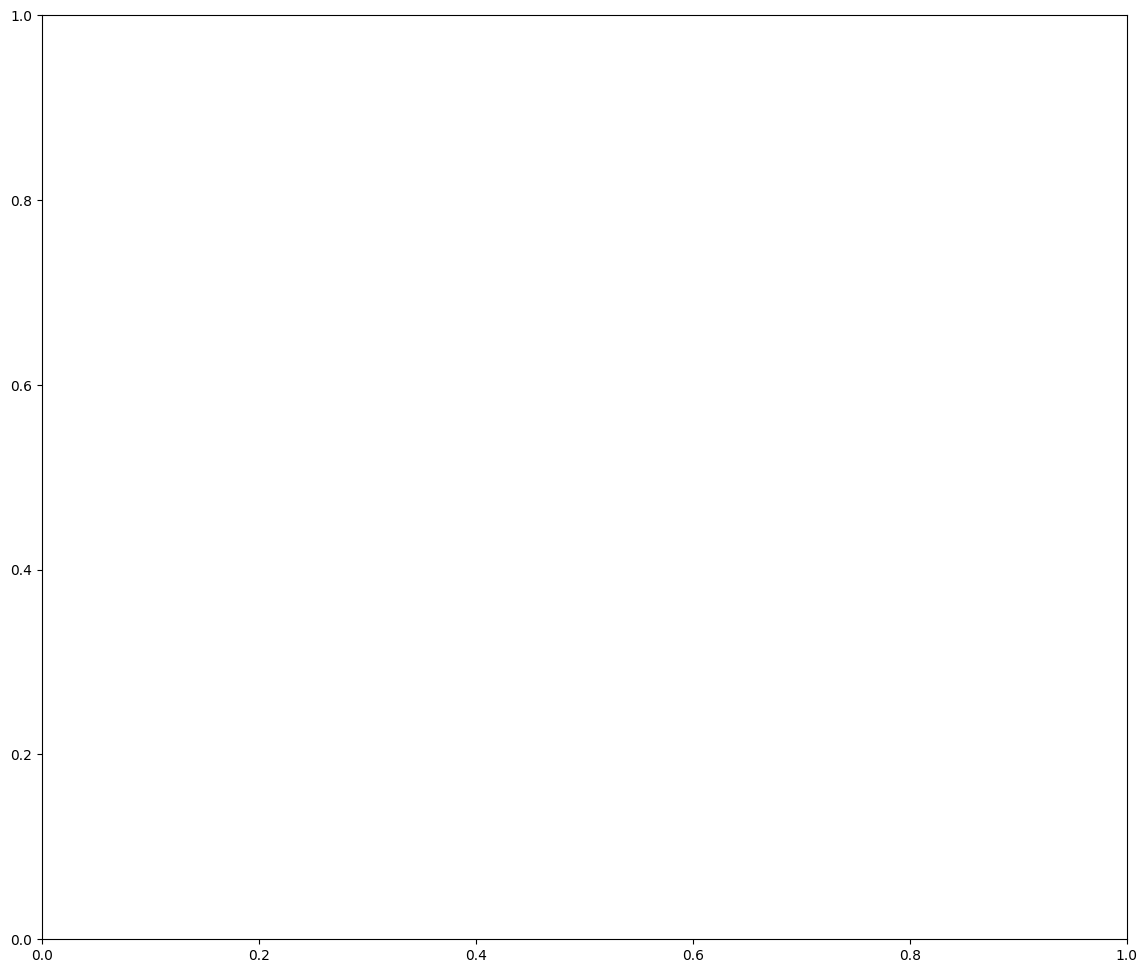

In [22]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.animation as animation
import random
import os

# Define vocabularies
shared_vocab = ['the', 'is', 'red', 'round', 'apple', 'car', 'fast', 'tree', 'tall', 'house', 'small', 'blue']
english_unique = ['runs', 'jumps', 'flies', 'yellow', 'cat', 'dog', 'street', 'window', 'door', 'walks']
german_unique = ['läuft', 'springt', 'fliegt', 'gelb', 'katze', 'hund', 'straße', 'fenster', 'tür', 'geht']

english_vocab = shared_vocab + english_unique
german_vocab = shared_vocab + german_unique

def generate_sentences(vocab, count=50):
    return [' '.join(random.sample(vocab, k=random.randint(3, 6))) for _ in range(count)]

english_sentences = generate_sentences(english_vocab)
german_sentences = generate_sentences(german_vocab)

G = nx.DiGraph()
relations = []
meta_validations = []

for i in range(len(english_sentences)):
    e_words = english_sentences[i].split()
    g_words = german_sentences[i].split()
    for ew, gw in zip(e_words, g_words):
        G.add_node(ew, type='english')
        G.add_node(gw, type='german')
        rel = f'MAP({ew}<->{gw})'
        G.add_node(rel, type='mapping')
        G.add_edge(ew, rel)
        G.add_edge(gw, rel)
        relations.append(rel)

        mv = f'CONFIRM({rel})'
        G.add_node(mv, type='validation')
        G.add_edge(rel, mv)
        G.add_edge(mv, rel)
        meta_validations.append(mv)

# Layout once
pos = nx.spring_layout(G, seed=12, k=2)
node_type_colors = {
    'english': '#87CEFA',
    'german': '#FFD700',
    'mapping': '#90EE90',
    'validation': '#FF7F50'
}
node_colors = [node_type_colors.get(G.nodes[n].get('type'), 'gray') for n in G.nodes]

fig, ax = plt.subplots(figsize=(14, 12))
edges_drawn = []

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='English Word', markerfacecolor=node_type_colors['english'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='German Word', markerfacecolor=node_type_colors['german'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Semantic Mapping', markerfacecolor=node_type_colors['mapping'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Validation Edge', markerfacecolor=node_type_colors['validation'], markersize=10)
]

def update(step):
    ax.clear()
    ax.set_title("Semantic Mapping between English and German Vocabulary", fontsize=16)
    if step < len(relations):
        e = relations[step]
        edges_drawn.extend([(n, e) for n in G.predecessors(e)])
        edges_drawn.extend([(e, n) for n in G.successors(e)])
    elif step - len(relations) < len(meta_validations):
        v = meta_validations[step - len(relations)]
        edges_drawn.extend([(n, v) for n in G.predecessors(v)])
        edges_drawn.extend([(v, n) for n in G.successors(v)])

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=600, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=edges_drawn, edge_color='gray', arrows=True, ax=ax)
    ax.legend(handles=legend_elements, loc='upper right')
    ax.axis('off')

In [23]:
# get the directory outside of curr dir
curr_dir = os.getcwd()
output_data_path = os.path.join(curr_dir + r"\..", "Data/Output")
output_data_path

'c:\\Users\\erich\\OneDrive\\Documents\\Python Projects\\Semantica\\Semantica\\Notebooks\\..\\Data/Output'

In [24]:
# Add this import at the top with other imports
from tqdm.notebook import tqdm

# Modify the animation creation and saving part:
total_frames = len(relations) + len(meta_validations)
progress_bar = tqdm(total=total_frames, desc="Generating animation")

def update(step):
    ax.clear()
    ax.set_title("Semantic Mapping between English and German Vocabulary", fontsize=16)
    if step < len(relations):
        e = relations[step]
        edges_drawn.extend([(n, e) for n in G.predecessors(e)])
        edges_drawn.extend([(e, n) for n in G.successors(e)])
    elif step - len(relations) < len(meta_validations):
        v = meta_validations[step - len(relations)]
        edges_drawn.extend([(n, v) for n in G.predecessors(v)])
        edges_drawn.extend([(v, n) for n in G.successors(v)])

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=600, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=edges_drawn, edge_color='gray', arrows=True, ax=ax)
    ax.legend(handles=legend_elements, loc='upper right')
    ax.axis('off')
    progress_bar.update(1)

ani = animation.FuncAnimation(fig, update, frames=total_frames, interval=100, repeat=False)
ani_path = os.path.join(output_data_path, "semantic_mapping_animation.gif")
ani.save(ani_path, writer='pillow')
progress_bar.close()

Generating animation:   0%|          | 0/380 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Phase 2

In [21]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output
import networkx as nx
import matplotlib.animation as animation
import numpy as np
import random

# Assume we have 50 English and 50 German sentences already generated
shared_vocab = ['the', 'is', 'red', 'round', 'apple', 'car', 'fast', 'tree', 'tall', 'house', 'small', 'blue']
english_unique = ['runs', 'jumps', 'flies', 'yellow', 'cat', 'dog', 'street', 'window', 'door', 'walks']
german_unique = ['läuft', 'springt', 'fliegt', 'gelb', 'katze', 'hund', 'straße', 'fenster', 'tür', 'geht']
english_vocab = shared_vocab + english_unique
german_vocab = shared_vocab + german_unique

# Modify the sentence generation to ensure consistent pairs
def generate_sentences(vocab, count=50):
    sentences = []
    for _ in range(count):
        # Use a smaller length to reduce chance of index errors
        length = min(random.randint(3, 4), len(vocab))
        sentence = ' '.join(random.sample(vocab, k=length))
        sentences.append(sentence)
    return sentences

# Clear existing graph and create new one
G = nx.Graph()
positions = {}
velocities = {}
edge_weights = {}

# Generate sentences with corresponding lengths
english_sentences = generate_sentences(english_vocab)
german_sentences = generate_sentences(german_vocab)

# Create word pairs with proper tracking
word_pairs = []
for i in range(len(english_sentences)):
    en_words = english_sentences[i].split()
    de_words = german_sentences[i].split()
    min_len = min(len(en_words), len(de_words))
    
    for j in range(min_len):
        ew, gw = en_words[j], de_words[j]
        if (ew, gw) not in edge_weights:  # Only add new pairs
            word_pairs.append((ew, gw))
            G.add_node(ew, type='english')
            G.add_node(gw, type='german')
            G.add_edge(ew, gw)
            edge_weights[(ew, gw)] = 0.1
            edge_weights[(gw, ew)] = 0.1  # Add reverse mapping
            
            # Initialize positions only for new nodes
            if ew not in positions:
                positions[ew] = np.array([0.0, len(positions)])
                velocities[ew] = np.zeros(2)
            if gw not in positions:
                positions[gw] = np.array([2.0, len(positions)])
                velocities[gw] = np.zeros(2)

# Reset graph and data structures
G = nx.DiGraph()
edges_drawn = []
word_pairs = []

# Generate pairs and build graph
for i in range(len(english_sentences)):
    e_words = english_sentences[i].split()
    g_words = german_sentences[i].split()
    min_len = min(len(e_words), len(g_words))
    
    for j in range(min_len):
        ew, gw = e_words[j], g_words[j]
        mapping = f'MAP({ew}<->{gw})'
        
        # Add nodes and edges only if they don't exist
        if not G.has_node(mapping):
            G.add_node(ew, type='english')
            G.add_node(gw, type='german')
            G.add_node(mapping, type='mapping')
            G.add_edge(ew, mapping)
            G.add_edge(gw, mapping)
            word_pairs.append((ew, gw, mapping))

# Create layout and colors
pos = nx.spring_layout(G, seed=12, k=2)
node_colors = [node_type_colors.get(G.nodes[n].get('type'), 'gray') for n in G.nodes]

# Setup visualization
fig, ax = plt.subplots(figsize=(14, 12))
total_frames = len(word_pairs)
progress_bar = tqdm(total=total_frames, desc="Generating animation")

def update(step):
    ax.clear()
    ax.set_title("Semantic Mapping between English and German Vocabulary", fontsize=16)
    
    if step < len(word_pairs):
        ew, gw, mapping = word_pairs[step]
        edges_drawn.extend([(ew, mapping), (gw, mapping)])
        
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=600, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=edges_drawn, edge_color='gray', arrows=True, ax=ax)
    ax.legend(handles=legend_elements, loc='upper right')
    ax.axis('off')
    progress_bar.update(1)
    
    return ax

try:
    ani = animation.FuncAnimation(fig, update, frames=total_frames, 
                                interval=100, repeat=False, blit=False)
    ani_path = os.path.join(output_data_path, "semantic_mapping_animation.gif")
    ani.save(ani_path, writer='pillow')
finally:
    progress_bar.close()
    plt.close(fig)
    print(f"Animation saved to: {ani_path}")

Generating animation:   0%|          | 0/135 [00:00<?, ?it/s]

Animation saved to: c:\Users\erich\OneDrive\Documents\Python Projects\Semantica\Semantica\Notebooks\..\Data/Output\semantic_mapping_animation.gif


Generating animation:   0%|          | 0/50 [00:00<?, ?it/s]

Step 0: {'apple': array([0., 0.]), 'apfel': array([2., 0.]), 'red': array([0., 1.]), 'rot': array([2., 1.]), 'round': array([0., 2.]), 'rund': array([2., 2.])}
Step 0: {'apple': array([0., 0.]), 'apfel': array([2., 0.]), 'red': array([0., 1.]), 'rot': array([2., 1.]), 'round': array([0., 2.]), 'rund': array([2., 2.])}
Step 10: {'apple': array([0., 0.]), 'apfel': array([2., 0.]), 'red': array([0., 1.]), 'rot': array([2., 1.]), 'round': array([0., 2.]), 'rund': array([2., 2.])}
Step 20: {'apple': array([0., 0.]), 'apfel': array([2., 0.]), 'red': array([0., 1.]), 'rot': array([2., 1.]), 'round': array([0., 2.]), 'rund': array([2., 2.])}
Step 30: {'apple': array([0., 0.]), 'apfel': array([2., 0.]), 'red': array([0., 1.]), 'rot': array([2., 1.]), 'round': array([0., 2.]), 'rund': array([2., 2.])}
Step 40: {'apple': array([0., 0.]), 'apfel': array([2., 0.]), 'red': array([0., 1.]), 'rot': array([2., 1.]), 'round': array([0., 2.]), 'rund': array([2., 2.])}
✅ Animation saved to: c:\Users\erich

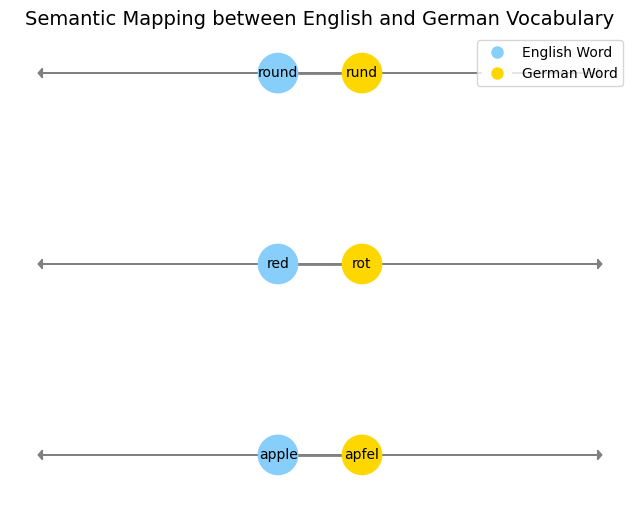

In [26]:
# Chat GPT version 
import os
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.animation as animation
import numpy as np
from tqdm.notebook import tqdm

# === PATH SETUP ===
curr_dir = os.getcwd()
output_data_path = os.path.join(curr_dir + r"\..", "Data/Output")
os.makedirs(output_data_path, exist_ok=True)  # Ensure path exists

# === SMALL EXAMPLE DATA ===
english = ['apple', 'red', 'round']
german = ['apfel', 'rot', 'rund']
pairs = list(zip(english, german))

# === GRAPH INITIALIZATION ===
G = nx.Graph()
positions = {}
velocities = {}
edges_drawn = []
node_colors = []
legend_elements = []

# Build Graph with convergence weights
for i, (en, de) in enumerate(pairs):
    G.add_node(en, type='english')
    G.add_node(de, type='german')
    G.add_edge(en, de, weight=0.1)

    positions[en] = np.array([0.0, i])
    positions[de] = np.array([2.0, i])
    velocities[en] = np.zeros(2)
    velocities[de] = np.zeros(2)

# Color mapping
node_colors = ['#87CEFA' if G.nodes[n]['type'] == 'english' else '#FFD700' for n in G.nodes]
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='English Word', markerfacecolor='#87CEFA', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='German Word', markerfacecolor='#FFD700', markersize=10),
]

# Layout positions (spring sim)
pos = nx.spring_layout(G, seed=42)

# === ANIMATION SETUP ===
fig, ax = plt.subplots(figsize=(8, 6))
steps = 50
spring_constant = 0.2         # Stronger force
damping = 0.90                # Less damping
convergence_increment = 0.03  # Accelerate semantic agreement

progress_bar = tqdm(total=steps, desc="Generating animation")

def update(step):
    ax.clear()
    ax.set_title("Semantic Mapping between English and German Vocabulary", fontsize=14)

    for u, v, data in G.edges(data=True):
        diff = positions[v] - positions[u]
        distance = np.linalg.norm(diff)
        direction = diff / distance if distance != 0 else np.zeros(2)
        force = spring_constant * data['weight'] * direction
        velocities[u] += force
        velocities[v] -= force
        data['weight'] = min(1.0, data['weight'] + convergence_increment)

    for n in G.nodes:
        ax.arrow(positions[n][0], positions[n][1], velocities[n][0], velocities[n][1],
                head_width=0.05, head_length=0.1, fc='gray', ec='gray')
    
    if step % 10 == 0:
        print(f"Step {step}: {positions}")

    pos_dict = {n: positions[n] for n in G.nodes}
    nx.draw_networkx_nodes(G, pos=pos_dict, node_color=node_colors, node_size=800, ax=ax)
    nx.draw_networkx_labels(G, pos=pos_dict, ax=ax, font_size=10)
    nx.draw_networkx_edges(G, pos=pos_dict, ax=ax, edge_color='gray', width=2)
    ax.legend(handles=legend_elements, loc='upper right')
    ax.axis('off')
    progress_bar.update(1)

ani = animation.FuncAnimation(fig, update, frames=steps, interval=300, repeat=False)

# === SAVE TO CORRECT DIRECTORY ===
ani_path = os.path.join(output_data_path, "semantic_mapping_animation.gif")
ani.save(ani_path, writer='pillow')
progress_bar.close()

print(f"✅ Animation saved to: {ani_path}")


# Phase 3

Rendering Animation:   0%|          | 0/80 [00:00<?, ?it/s]

C:\Users\erich\AppData\Local\Temp\ipykernel_2260\2874486526.py:66: UserWarning: Glyph 127822 (\N{RED APPLE}) missing from font(s) DejaVu Sans.
  ani.save(gif_path, writer='pillow')
C:\Users\erich\AppData\Local\Temp\ipykernel_2260\2874486526.py:66: UserWarning: Glyph 11093 (\N{HEAVY LARGE CIRCLE}) missing from font(s) DejaVu Sans.
  ani.save(gif_path, writer='pillow')
C:\Users\erich\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 127822 (\N{RED APPLE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\erich\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 11093 (\N{HEAVY LARGE CIRCLE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


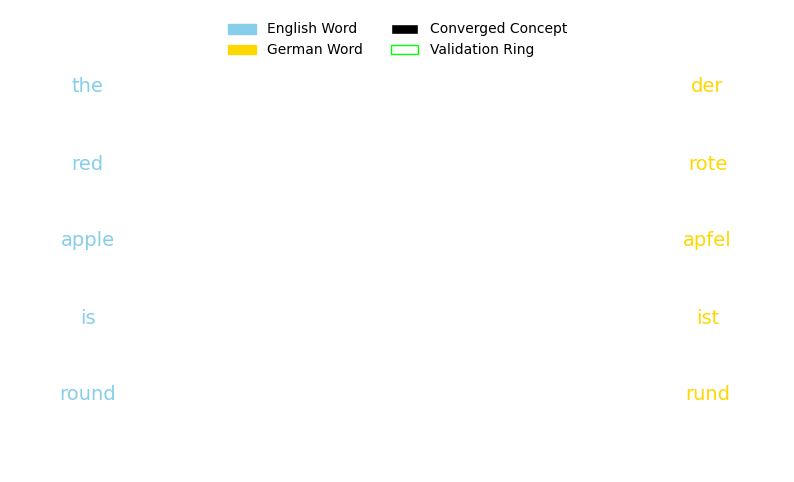

In [27]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
from tqdm.notebook import tqdm

# === SAFE CROSS-PLATFORM PATH ===
curr_dir = os.path.abspath(os.getcwd())
output_data_path = os.path.join(os.path.dirname(curr_dir), "Data", "Output")
os.makedirs(output_data_path, exist_ok=True)

# === SENTENCE DATA ===
english_words = ["the", "red", "apple", "is", "round"]
german_words = ["der", "rote", "apfel", "ist", "rund"]
fused_symbols = ["", "", "🍎", "", "⭕"]

start_x_en = 1.0
start_x_de = 9.0
center_x = 5.0
y_positions = np.linspace(5, 1, len(english_words))

positions_en = [np.array([start_x_en, y]) for y in y_positions]
positions_de = [np.array([start_x_de, y]) for y in y_positions]
positions_center = [np.array([center_x, y]) for y in y_positions]

# === ANIMATION SETUP ===
fig, ax = plt.subplots(figsize=(10, 6))
frames = 60
progress_bar = tqdm(total=frames + 20, desc="Rendering Animation")

def update(frame):
    ax.clear()
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.axis('off')
    alpha = frame / (frames - 1)

    for i in range(len(english_words)):
        pos_current_en = positions_en[i] * (1 - alpha) + positions_center[i] * alpha
        pos_current_de = positions_de[i] * (1 - alpha) + positions_center[i] * alpha

        if alpha < 1.0:
            ax.text(*pos_current_en, english_words[i], fontsize=14, ha='center', va='center', color='skyblue')
            ax.text(*pos_current_de, german_words[i], fontsize=14, ha='center', va='center', color='gold')
        else:
            ax.text(*positions_center[i], fused_symbols[i] or english_words[i], fontsize=18,
                    ha='center', va='center', color='white', bbox=dict(facecolor='black', boxstyle='circle'))
            pulse = patches.Circle(positions_center[i], radius=0.6 + 0.05 * np.sin((frame - frames) * 0.3),
                                   fill=False, lw=2, color='lime', alpha=0.7)
            ax.add_patch(pulse)

    handles = [
        patches.Patch(color='skyblue', label='English Word'),
        patches.Patch(color='gold', label='German Word'),
        patches.Patch(facecolor='black', edgecolor='white', label='Converged Concept'),
        patches.Patch(facecolor='none', edgecolor='lime', label='Validation Ring')
    ]
    ax.legend(handles=handles, loc='upper center', ncol=2, frameon=False)
    progress_bar.update(1)

ani = animation.FuncAnimation(fig, update, frames=frames + 20, interval=150, repeat=False)

# === SAVE GIF ===
gif_path = os.path.join(output_data_path, "full_sentence_fusion.gif")
ani.save(gif_path, writer='pillow')
progress_bar.close()

# Phase 4

Rendering Animation:   0%|          | 0/80 [00:00<?, ?it/s]

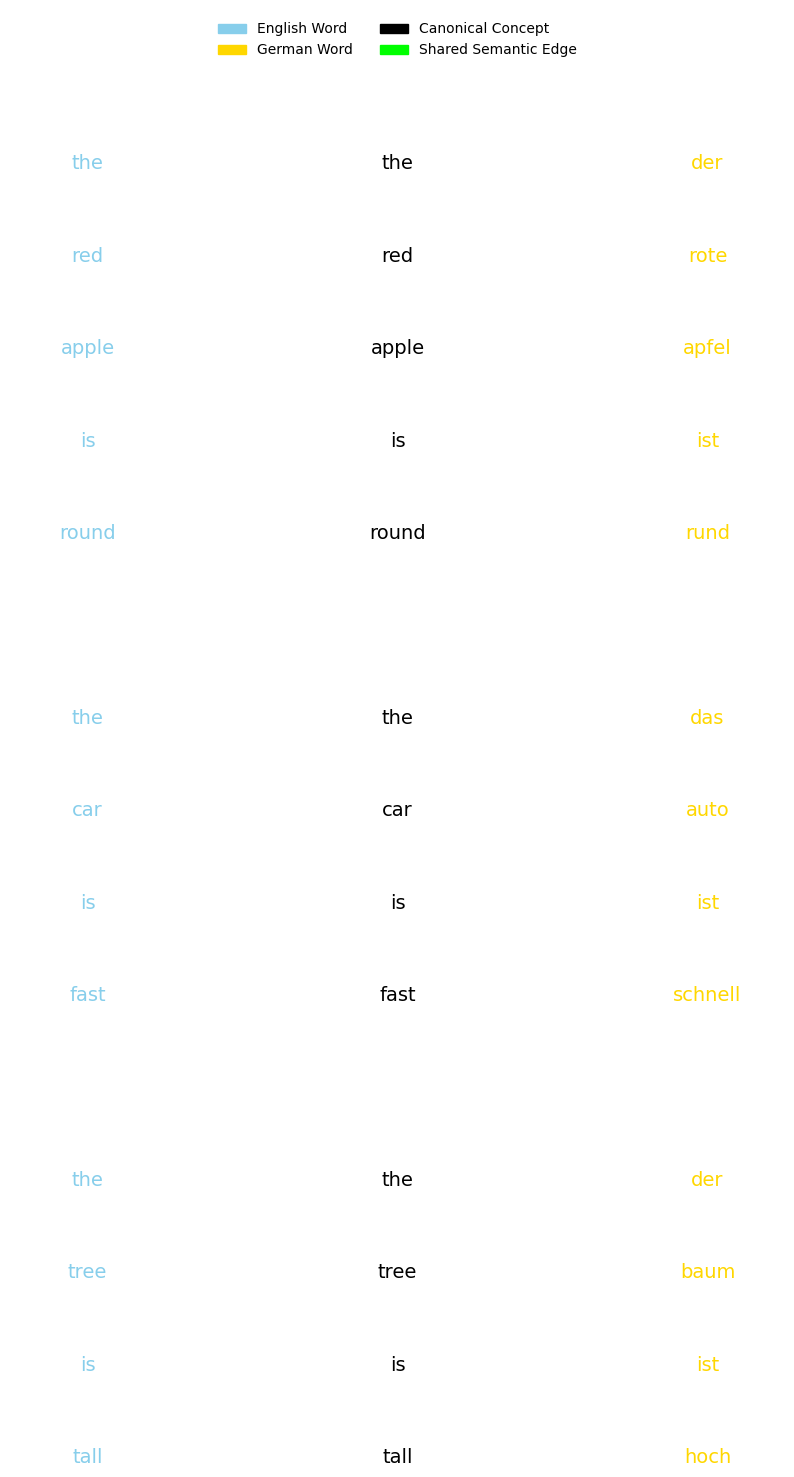

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
from tqdm.notebook import tqdm

# === SAFE CROSS-PLATFORM PATH ===
curr_dir = os.path.abspath(os.getcwd())
output_data_path = os.path.join(os.path.dirname(curr_dir), "Data", "Output")
os.makedirs(output_data_path, exist_ok=True)

# === EXTENDED SENTENCES ===
english_sentences = [
    ["the", "red", "apple", "is", "round"],
    ["the", "car", "is", "fast"],
    ["the", "tree", "is", "tall"]
]
german_sentences = [
    ["der", "rote", "apfel", "ist", "rund"],
    ["das", "auto", "ist", "schnell"],
    ["der", "baum", "ist", "hoch"]
]

# === GRAPH STRUCTURE ===
nodes = []
edges = set()
sentence_pairs = list(zip(english_sentences, german_sentences))
all_positions = []
colors = []
labels = []
start_x_en, start_x_de, center_x = 1.0, 9.0, 5.0
row_gap = 1.2

# Build node layout and shared concept edges
y_cursor = 5.0
word_index_map = {}  # Map to track existing concepts for linking

for sentence_idx, (en_sentence, de_sentence) in enumerate(sentence_pairs):
    sent_len = min(len(en_sentence), len(de_sentence))
    for i in range(sent_len):
        en_word = en_sentence[i]
        de_word = de_sentence[i]
        concept = en_word  # Treat English as canonical concept for now

        y = y_cursor - i * row_gap
        en_pos = np.array([start_x_en, y])
        de_pos = np.array([start_x_de, y])
        mid_pos = np.array([center_x, y])

        nodes.extend([(en_word, en_pos, 'skyblue'), (de_word, de_pos, 'gold'), (concept, mid_pos, 'black')])
        edges.update({(en_word, concept), (de_word, concept)})

        if concept in word_index_map:
            for prev in word_index_map[concept]:
                edges.add((prev, concept))
        word_index_map.setdefault(concept, []).append(concept)

    y_cursor -= (sent_len + 1) * row_gap

# === ANIMATION SETUP ===
fig, ax = plt.subplots(figsize=(10, 8))
frames = 60
progress_bar = tqdm(total=frames + 20, desc="Rendering Animation")

def interpolate(start, end, alpha):
    return start * (1 - alpha) + end * alpha

def update(frame):
    ax.clear()
    ax.set_xlim(0, 10)
    ax.set_ylim(-1, 7)
    ax.axis('off')
    alpha = min(1.0, frame / (frames - 1))

    node_pos = {}
    for name, pos, _ in nodes:
        if name not in node_pos:
            node_pos[name] = []
        node_pos[name].append(pos)

    final_positions = {}
    for name, pos_list in node_pos.items():
        final_positions[name] = np.mean(pos_list, axis=0)

    for name, start_pos, color in nodes:
        end_pos = final_positions[name]
        current_pos = interpolate(start_pos, end_pos, alpha)
        if alpha < 1.0:
            ax.text(*current_pos, name, fontsize=14, ha='center', va='center', color=color)
        else:
            ax.text(*end_pos, name, fontsize=14, ha='center', va='center',
                    color='white', bbox=dict(facecolor=color, boxstyle='circle'))

    if alpha >= 1.0:
        for u, v in edges:
            try:
                p1 = final_positions[u]
                p2 = final_positions[v]
                ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='lime', lw=2)
            except KeyError:
                continue

    # Legend
    handles = [
        patches.Patch(color='skyblue', label='English Word'),
        patches.Patch(color='gold', label='German Word'),
        patches.Patch(color='black', label='Canonical Concept'),
        patches.Patch(color='lime', label='Shared Semantic Edge')
    ]
    ax.legend(handles=handles, loc='upper center', ncol=2, frameon=False)
    progress_bar.update(1)

ani = animation.FuncAnimation(fig, update, frames=frames + 20, interval=150, repeat=False)

# === SAVE GIF ===
gif_path = os.path.join(output_data_path, "multi_sentence_convergence.gif")
ani.save(gif_path, writer='pillow')
progress_bar.close()

# Phase 5

Rendering Animation:   0%|          | 0/80 [00:00<?, ?it/s]C:\Users\erich\AppData\Local\Temp\ipykernel_2260\2233285435.py:147: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  ani.save(gif_path, writer='pillow')
C:\Users\erich\AppData\Local\Temp\ipykernel_2260\2233285435.py:147: UserWarning: Glyph 127822 (\N{RED APPLE}) missing from font(s) DejaVu Sans.
  ani.save(gif_path, writer='pillow')
C:\Users\erich\AppData\Local\Temp\ipykernel_2260\2233285435.py:147: UserWarning: Glyph 11093 (\N{HEAVY LARGE CIRCLE}) missing from font(s) DejaVu Sans.
  ani.save(gif_path, writer='pillow')
C:\Users\erich\AppData\Local\Temp\ipykernel_2260\2233285435.py:147: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  ani.save(gif_path, writer='pillow')
C:\Users\erich\AppData\Local\Temp\ipykernel_2260\2233285435.py:147: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  ani.save(gif_path, writer='pillow')
C:\Users\e

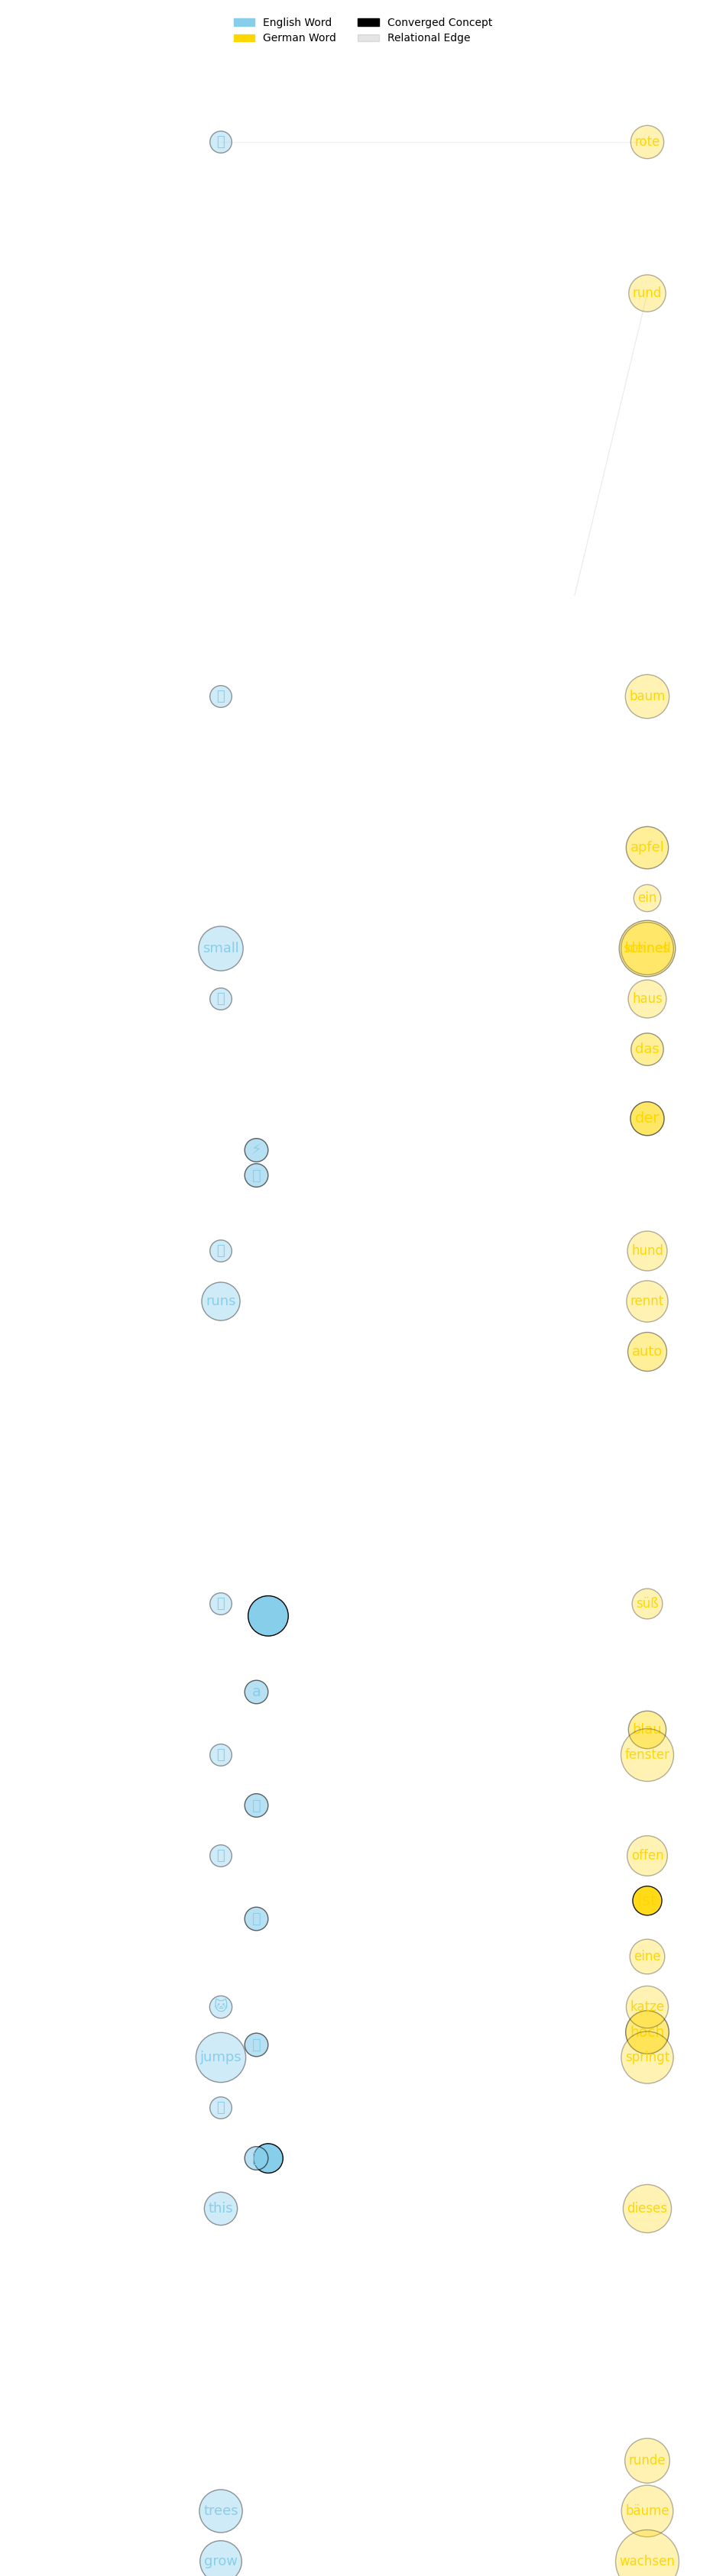

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
from tqdm import tqdm
from collections import defaultdict

curr_dir = os.getcwd()
output_data_path = os.path.join(curr_dir + r"\..", "Data/Output")

# === SENTENCE DATA (10 pairs total) ===
english_sentences = [
    ["the", "red", "apple", "is", "round"],
    ["the", "car", "is", "fast"],
    ["the", "tree", "is", "tall"],
    ["a", "small", "house", "is", "blue"],
    ["the", "dog", "runs", "fast"],
    ["the", "apple", "is", "sweet"],
    ["the", "window", "is", "open"],
    ["a", "cat", "jumps", "high"],
    ["this", "car", "is", "blue"],
    ["round", "trees", "grow", "tall"]
]

german_sentences = [
    ["der", "rote", "apfel", "ist", "rund"],
    ["das", "auto", "ist", "schnell"],
    ["der", "baum", "ist", "hoch"],
    ["ein", "kleines", "haus", "ist", "blau"],
    ["der", "hund", "rennt", "schnell"],
    ["der", "apfel", "ist", "süß"],
    ["das", "fenster", "ist", "offen"],
    ["eine", "katze", "springt", "hoch"],
    ["dieses", "auto", "ist", "blau"],
    ["runde", "bäume", "wachsen", "hoch"]
]

# === EMOJI FUSION MAPPING ===
emoji_map = {
    "apple": "🍎",
    "car": "🚗",
    "tree": "🌳",
    "house": "🏠",
    "dog": "🐶",
    "cat": "🐱",
    "window": "🪟",
    "blue": "🔵",
    "red": "🔴",
    "fast": "⚡",
    "round": "⭕",
    "sweet": "🍬",
    "tall": "📏",
    "open": "🚪",
    "high": "📶"
}

# === GRAPH STRUCTURE ===
nodes = []
edges = set()
strength_map = defaultdict(int)
positions = {}
colors = {}
start_x_en, start_x_de, center_x = 1.0, 9.0, 5.0
row_gap = 1.2
font_size_base = 10
y_cursor = 10.0

# Build layout
for sentence_idx, (en_sentence, de_sentence) in enumerate(zip(english_sentences, german_sentences)):
    sent_len = min(len(en_sentence), len(de_sentence))
    for i in range(sent_len):
        en_word = en_sentence[i]
        de_word = de_sentence[i]
        concept = en_word

        y = y_cursor - i * row_gap
        en_pos = np.array([start_x_en, y])
        de_pos = np.array([start_x_de, y])
        mid_pos = np.array([center_x, y])

        for word, pos, color in [(en_word, en_pos, 'skyblue'), (de_word, de_pos, 'gold'), (concept, mid_pos, 'black')]:
            if word not in positions:
                positions[word] = pos
                colors[word] = color
                strength_map[word] = 1
            else:
                positions[word] = (positions[word] + pos) / 2
                strength_map[word] += 1

            # Replace display with emoji if available
            if word in emoji_map:
                word_display = emoji_map[word]
            else:
                word_display = word

        edges.add((en_word, concept))
        edges.add((de_word, concept))

    y_cursor -= (sent_len + 1) * row_gap

# === ANIMATION SETUP ===
fig, ax = plt.subplots(figsize=(12, 10))
frames = 80
progress_bar = tqdm(total=frames, desc="Rendering Animation")

def interpolate(start, end, alpha):
    return start * (1 - alpha) + end * alpha

def update(frame):
    ax.clear()
    ax.set_xlim(0, 10)
    ax.set_ylim(-2, 12)
    ax.axis('off')
    alpha = frame / (frames - 1)

    for u, v in edges:
        if u in positions and v in positions:
            p1 = interpolate(positions[u], positions[v], alpha)
            p2 = interpolate(positions[v], positions[u], alpha)
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='black', alpha=0.05 + 0.005 * strength_map[v], lw=1)

    for word, pos in positions.items():
        interp_pos = interpolate(pos, np.array([center_x, pos[1]]), alpha)
        color = colors.get(word, 'gray')
        opacity = min(1.0, 0.2 + 0.1 * strength_map[word])
        font_size = font_size_base + 2 * np.sqrt(strength_map[word])
        word_display = emoji_map.get(word, word)
        ax.text(*interp_pos, word_display, fontsize=font_size, ha='center', va='center',
                color='white' if alpha > 0.9 else color,
                bbox=dict(facecolor=color, boxstyle='circle', alpha=opacity))

    legend_elements = [
        patches.Patch(color='skyblue', label='English Word'),
        patches.Patch(color='gold', label='German Word'),
        patches.Patch(color='black', label='Converged Concept'),
        patches.Patch(color='black', alpha=0.1, label='Relational Edge')
    ]
    ax.legend(handles=legend_elements, loc='upper center', ncol=2, frameon=False)
    progress_bar.update(1)

ani = animation.FuncAnimation(fig, update, frames=frames, interval=150, repeat=False)

# === SAVE GIF ===
gif_path = os.path.join(output_data_path, "multi_sentence_convergence.gif")
ani.save(gif_path, writer='pillow')
progress_bar.close()